## Trying to interpret singular vectors

In [1]:
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import solve_lyapunov
from scipy.integrate import solve_ivp

In [2]:
%precision 2

'%.2f'

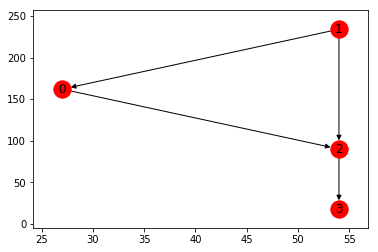

In [3]:
G = nx.DiGraph()
G.add_nodes_from([0,1,2,3])
G.add_edges_from([
    (0,2),
    (1,0),
    (1,2),
    (2,3)
])
N = nx.number_of_nodes(G)
nx.draw_networkx(G, pos=graphviz_layout(G, prog='dot'))

In [4]:
A = nx.adjacency_matrix(G)
D = np.diag(np.asarray(np.sum(A, axis=1)).reshape(-1))
L = D-A
np.linalg.matrix_rank(L)

3

### Symmetrization

In [5]:
def orth_matrix(A):
    u, s, vh = np.linalg.svd(A, full_matrices=True)
    M, N = u.shape[0], vh.shape[1]
    rcond = np.finfo(s.dtype).eps * max(M, N)
    tol = np.amax(s) * rcond
    num = np.sum(s > tol, dtype=int)
    Q = vh[0:num,:].T.conj()
    return Q

In [6]:
Q = orth_matrix(L).T
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))
sigma = solve_lyapunov(rL, np.identity(np.linalg.matrix_rank(L)))
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))
eqL = np.linalg.pinv(x)

In [7]:
Q

matrix([[-0.36,  0.78, -0.51,  0.1 ],
        [-0.56,  0.24,  0.7 , -0.38],
        [ 0.55,  0.3 , -0.08, -0.77]])

Create undirected graph from the equivalent Laplacian

In [8]:
eqG = nx.Graph()

for i in np.arange(0,np.shape(eqL)[0]):
    for j in np.arange(i+1,np.shape(eqL)[1]):
        eqG.add_edge(i,j,weight=eqL[i,j])

In [11]:
eqL

matrix([[ 1.07e+00, -8.57e-01, -2.14e-01,  6.38e-17],
        [-8.57e-01,  1.29e+00, -4.29e-01, -1.77e-16],
        [-2.14e-01, -4.29e-01,  1.14e+00, -5.00e-01],
        [-1.38e-16,  9.69e-17, -5.00e-01,  5.00e-01]])

In [10]:
np.linalg.matrix_rank(eqL)

3